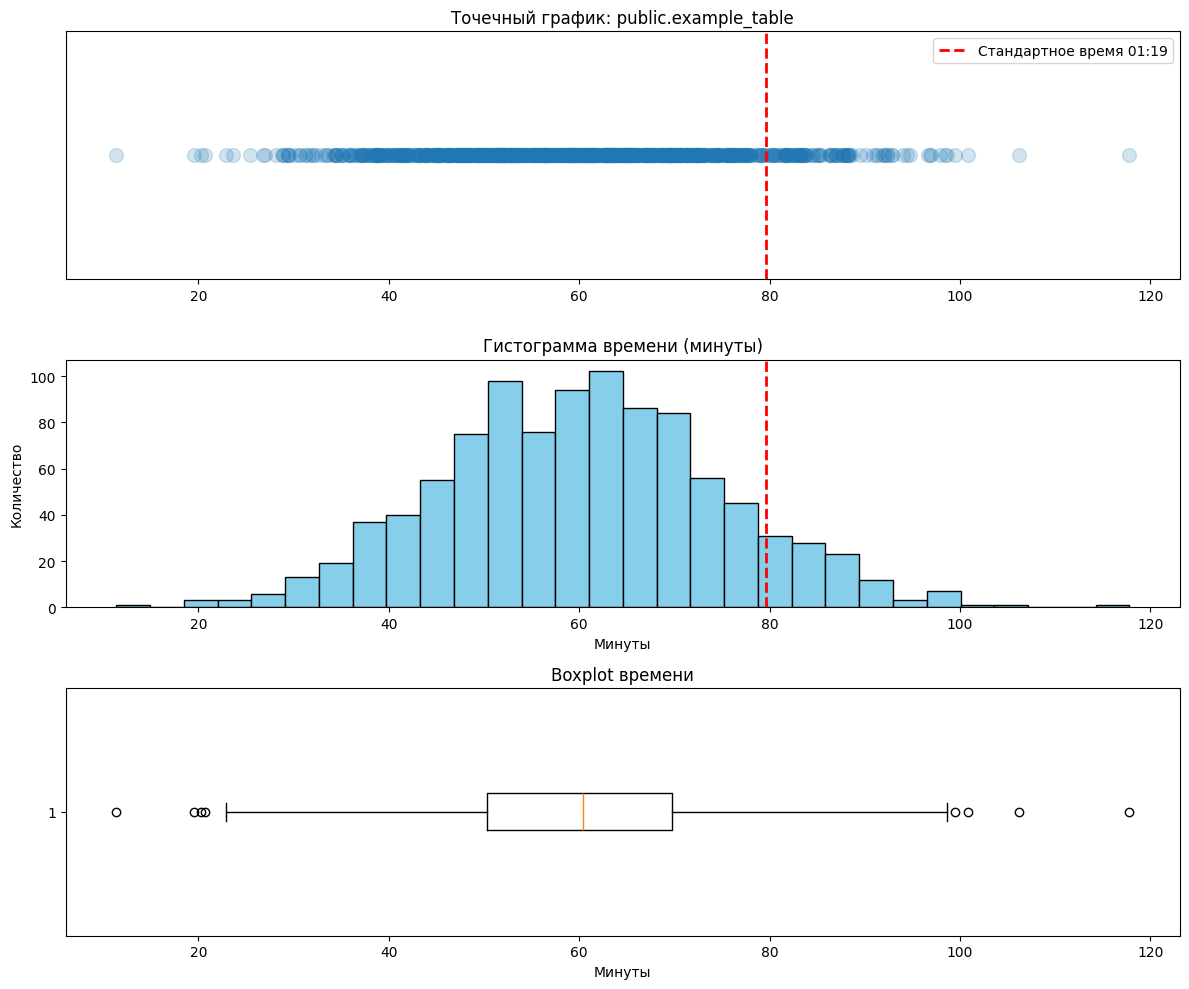

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Примерные данные
np.random.seed(42)
df = pd.DataFrame({
    'minutes': np.random.normal(loc=60, scale=15, size=1000)  # времена в минутах
})

# Фильтрация по какому-то условию (пример)
filtered_df = df[df['minutes'] < 120]

# 90-й перцентиль
percentile_90 = np.percentile(filtered_df['minutes'], 90)

# Функция перевода минут в формат ЧЧ:ММ (пример)
def minutes_to_time(mins):
    h = int(mins) // 60
    m = int(mins) % 60
    return f"{h:02d}:{m:02d}"

# Названия таблицы и схемы (пример)
schema = 'public'
table = 'example_table'

# Сетка из 3 строк, по одному графику на строку
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 10))

# График 1: Точечный
ax1.scatter(filtered_df['minutes'], np.ones(len(filtered_df)), alpha=0.2, s=100) # По y сделал просто массив единиц np.ones(len(filtered_df))
ax1.axvline(x=percentile_90, color='red', linestyle='--', linewidth=2,label=f'Стандартное время {minutes_to_time(percentile_90)}')
ax1.set_title(f'Точечный график: {schema}.{table}')
ax1.legend()
ax1.set_yticks([])  # Убираем ось Y

# График 2: Гистограмма
ax2.hist(filtered_df['minutes'], bins=30, color='skyblue', edgecolor='black')
ax2.axvline(x=percentile_90, color='red', linestyle='--', linewidth=2)
ax2.set_title('Гистограмма времени (минуты)')
ax2.set_xlabel('Минуты')
ax2.set_ylabel('Количество')

# График 3: Boxplot
ax3.boxplot(filtered_df['minutes'], vert=False)
ax3.set_title('Boxplot времени')
ax3.set_xlabel('Минуты')

plt.tight_layout()
plt.show()
